In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('exercise.csv')

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df.shape

(15000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5


In [19]:
df2 = pd.read_csv('calories.csv')

In [20]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [21]:
df2.shape

(15000, 2)

In [23]:
df = pd.merge(df, df2, on='User_ID', how='left')

In [24]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Exploratory Data Analysis

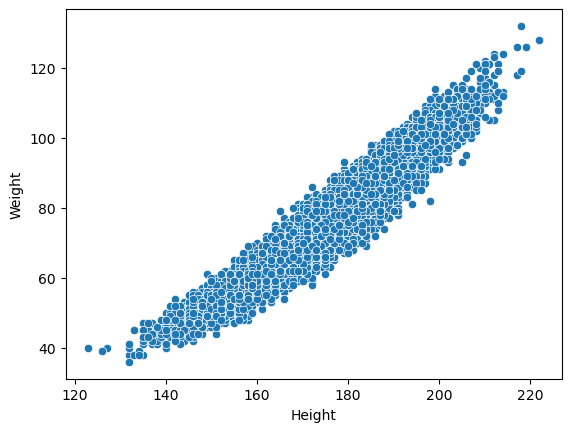

In [25]:
sns.scatterplot(x=df['Height'],y=df['Weight'])
plt.show()

So, there have a kind of linear relationship between these two features

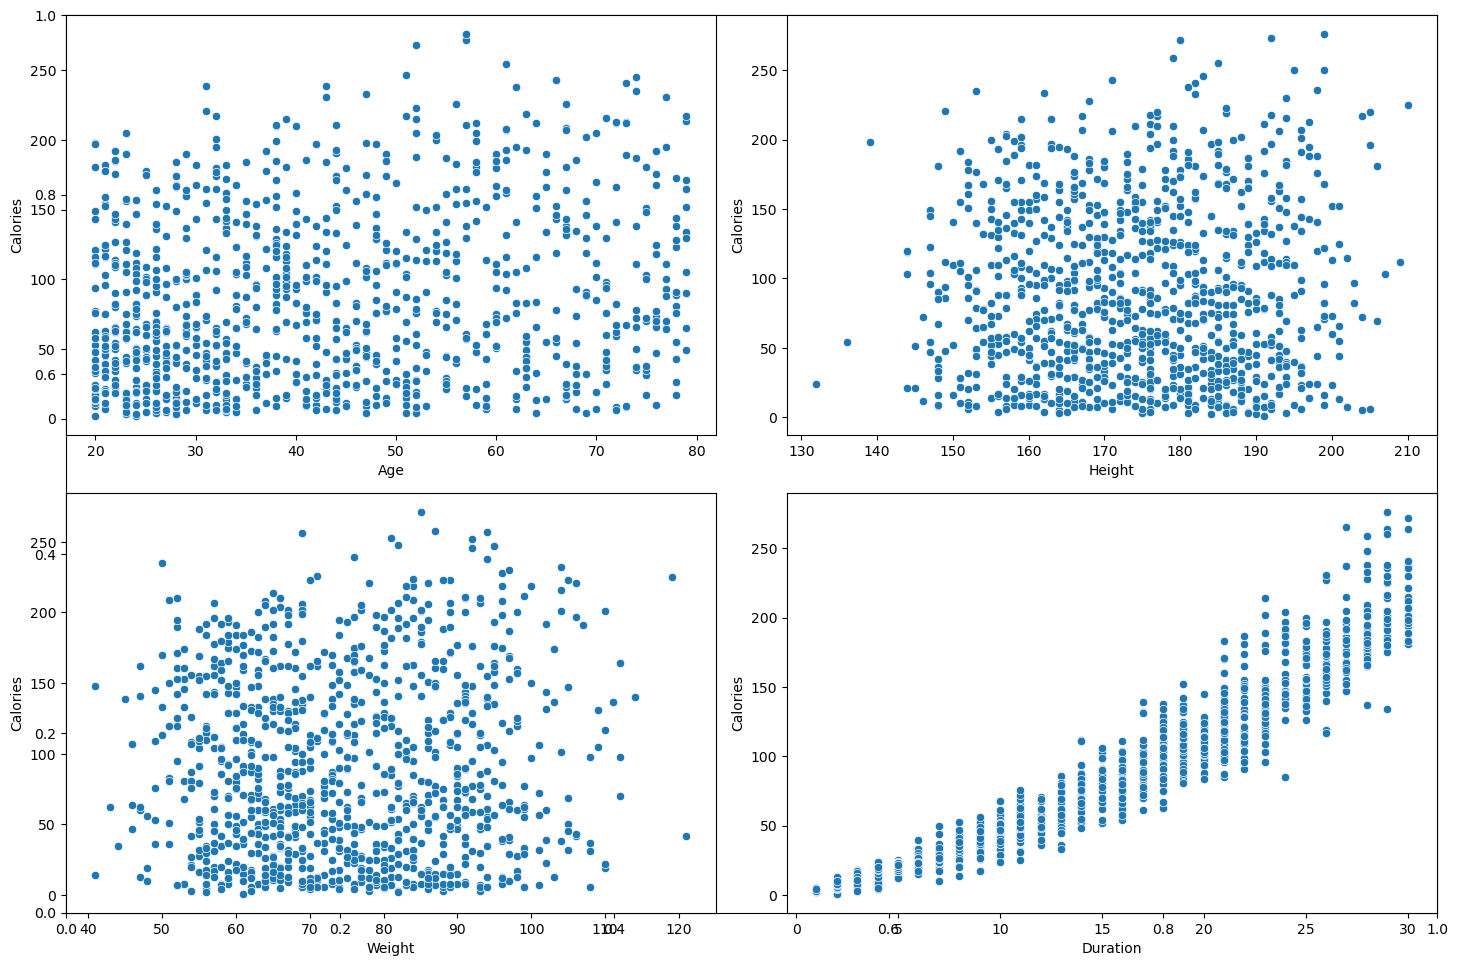

In [26]:
features = ['Age', 'Height', 'Weight', 'Duration'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    x = df.sample(1000) 
    sns.scatterplot(x=x[col], y=x['Calories']) 
plt.tight_layout() 
plt.show() 

/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_69037/726863226.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_69037/726863226.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/b1/06nddx95

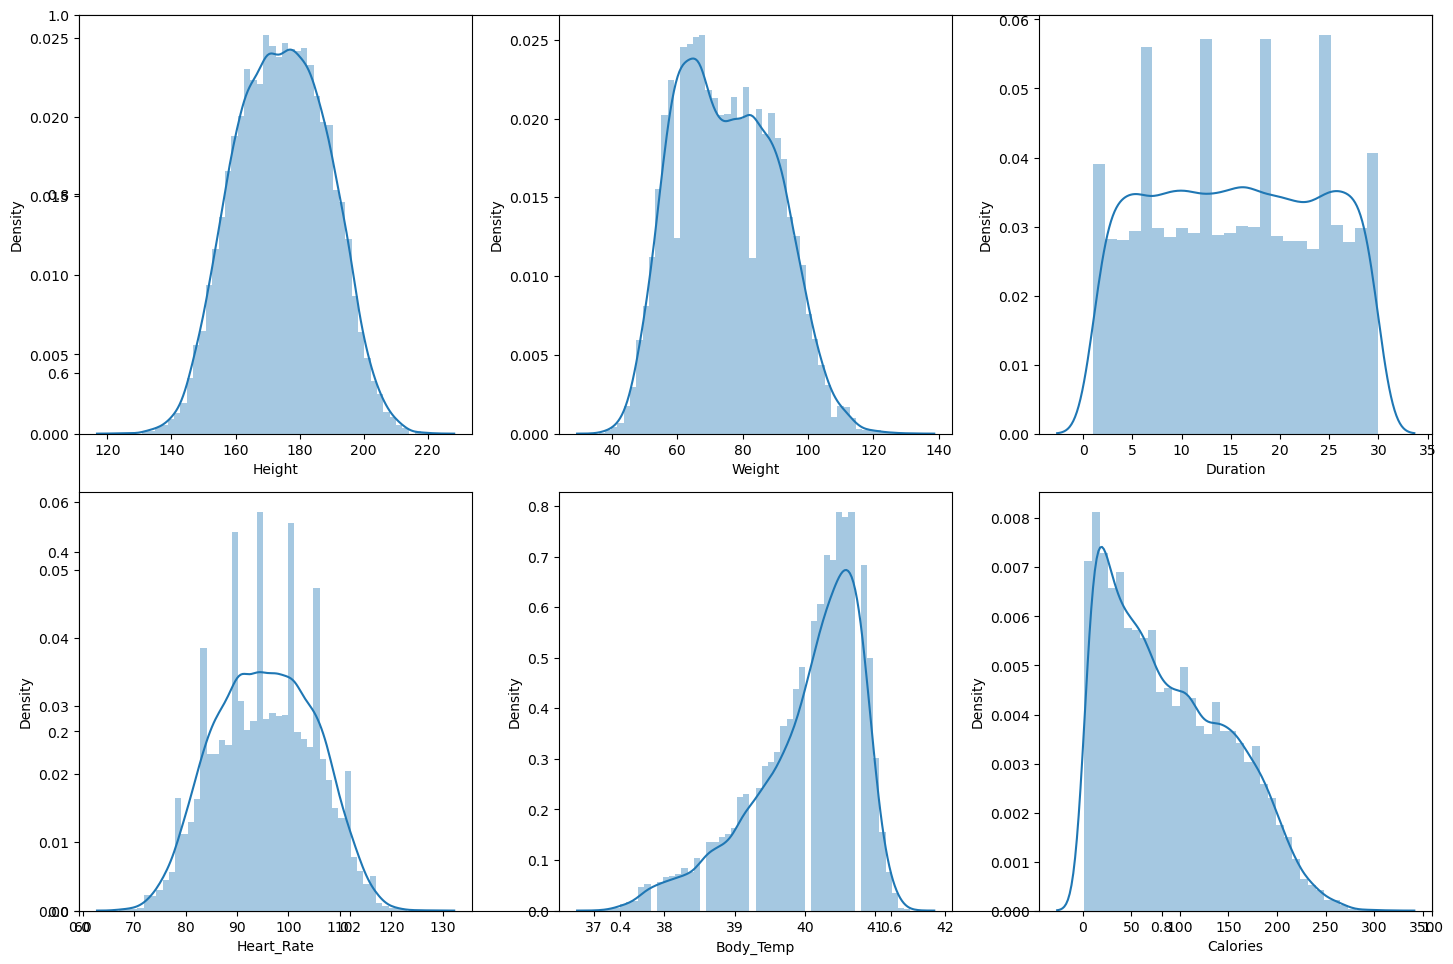

In [27]:
features = df.select_dtypes(include='float').columns 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    sns.distplot(df[col]) 
plt.tight_layout() 
plt.show() 

In [29]:
df.replace({'male':0,'female':1},inplace=True)

/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_69037/3572712323.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male':0,'female':1},inplace=True)


In [30]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


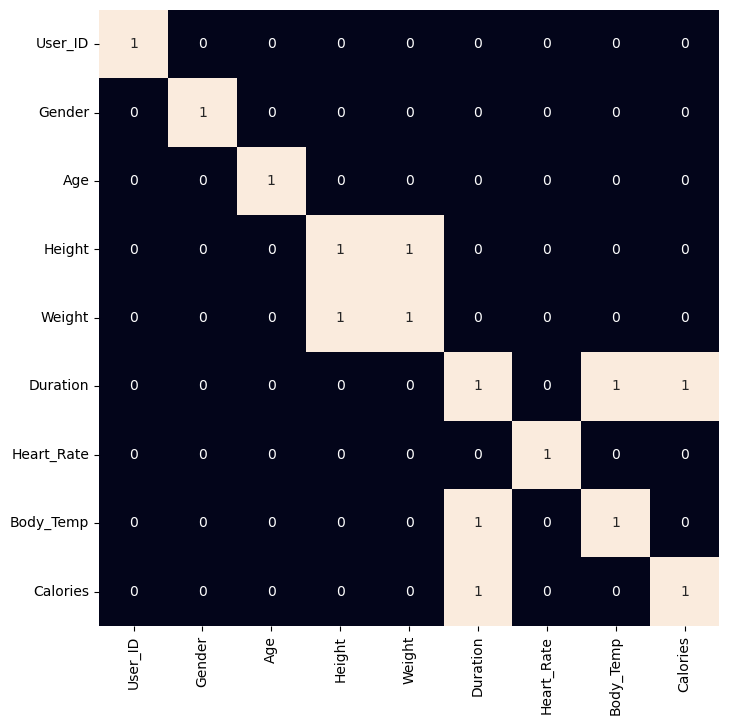

In [32]:
plt.figure(figsize=(8, 8)) 
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [33]:
df.drop(columns = ['Weight', 'Duration'] , axis=1, inplace=True) 

In [34]:
df.head()

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,105.0,40.8,231.0
1,14861698,1,20,166.0,94.0,40.3,66.0
2,11179863,0,69,179.0,88.0,38.7,26.0
3,16180408,1,34,179.0,100.0,40.5,71.0
4,17771927,1,27,154.0,81.0,39.8,35.0


## Model Training

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
features

Index(['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'], dtype='object')

In [37]:
features = df.drop(['User_ID', 'Calories'], axis=1) 
target = df['Calories'].values 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [40]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12000, 5), (3000, 5), (12000,), (3000,))

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [42]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [43]:
from sklearn.metrics import mean_absolute_error as mae 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

In [44]:
models = [LinearRegression(), XGBRegressor(), 
          Lasso(), RandomForestRegressor(), Ridge()] 
  
for i in range(5): 
    models[i].fit(X_train, Y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 
  
    test_preds = models[i].predict(X_test) 
    print('Validation Error : ', mae(Y_test, test_preds)) 
    print() 

LinearRegression() : 
Training Error :  18.036900008310973
Validation Error :  17.455850337727263

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.677306986099109
Validation Error :  10.338286433247228

Lasso() : 
Training Error :  18.05200305470391
Validation Error :  17.50294